In [1]:
path = '../../../data/electricity_demand_ciso.csv'

In [2]:
import pandas as pd
df = pd.read_csv(path, parse_dates=['period'])

df

period subba                           subba-name  \
0      2025-05-25 07:00:00+00:00  PGAE             Pacific Gas and Electric   
1      2025-05-25 07:00:00+00:00   SCE           Southern California Edison   
...                          ...   ...                                  ...   
223795 2019-01-01 00:00:00+00:00  SDGE    San Diego Gas and Electric - CISO   
223796 2019-01-01 00:00:00+00:00   VEA  Valley Electric Association  - CISO   

       parent                             parent-name  value    value-units  
0        CISO  California Independent System Operator  11322  megawatthours  
1        CISO  California Independent System Operator  11263  megawatthours  
...       ...                                     ...    ...            ...  
223795   CISO  California Independent System Operator   2414  megawatthours  
223796   CISO  California Independent System Operator     75  megawatthours  

[223797 rows x 7 columns]

In [3]:
df.period = df.period.dt.tz_convert('America/Los_Angeles')

In [4]:
df

period subba                           subba-name  \
0      2025-05-25 00:00:00-07:00  PGAE             Pacific Gas and Electric   
1      2025-05-25 00:00:00-07:00   SCE           Southern California Edison   
...                          ...   ...                                  ...   
223795 2018-12-31 16:00:00-08:00  SDGE    San Diego Gas and Electric - CISO   
223796 2018-12-31 16:00:00-08:00   VEA  Valley Electric Association  - CISO   

       parent                             parent-name  value    value-units  
0        CISO  California Independent System Operator  11322  megawatthours  
1        CISO  California Independent System Operator  11263  megawatthours  
...       ...                                     ...    ...            ...  
223795   CISO  California Independent System Operator   2414  megawatthours  
223796   CISO  California Independent System Operator     75  megawatthours  

[223797 rows x 7 columns]

## Pivot table

In [5]:
x = df.pivot_table(index='period', columns='subba', values='value')
x

subba                         PGAE      SCE    SDGE   VEA
period                                                   
2018-12-31 16:00:00-08:00  10440.0  10287.0  2414.0  75.0
2018-12-31 17:00:00-08:00  11256.0  11039.0  2566.0  86.0
...                            ...      ...     ...   ...
2025-05-24 23:00:00-07:00  11873.0  11758.0  2287.0  66.0
2025-05-25 00:00:00-07:00  11322.0  11263.0  2178.0  59.0

[55954 rows x 4 columns]

In [6]:
df = x.copy()

In [11]:
import plotly.io as pio
pio.renderers.default = "svg"
pio.templates.default = "plotly_dark"

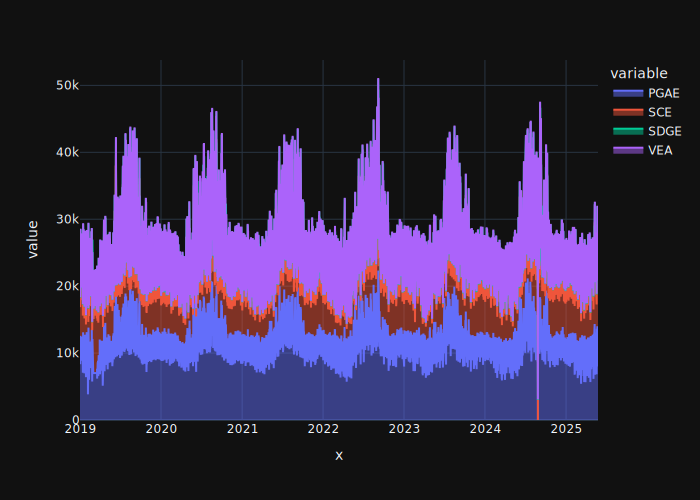

In [12]:
import plotly.express as px
px.area(x, y=df.columns, x=df.index)

## Filter

In [13]:
x = df.loc['2019':'2024'].copy()
x

subba                         PGAE      SCE    SDGE   VEA
period                                                   
2019-01-01 00:00:00-08:00  10219.0  10291.0  2202.0  92.0
2019-01-01 01:00:00-08:00   9851.0   9932.0  2090.0  92.0
...                            ...      ...     ...   ...
2024-12-31 22:00:00-08:00  10971.0  10876.0  2437.0  81.0
2024-12-31 23:00:00-08:00  10621.0  10711.0  2362.0  83.0

[52514 rows x 4 columns]

In [14]:
df = x.copy()

## Resample

In [15]:
x = df.resample('QE').sum()
x

subba                            PGAE         SCE       SDGE       VEA
period                                                                
2019-03-31 00:00:00-07:00  19356117.0  22207941.0  4398884.0  152692.0
2019-06-30 00:00:00-07:00  23340375.0  23398700.0  4084101.0  122191.0
...                               ...         ...        ...       ...
2024-09-30 00:00:00-07:00  28686196.0  32892074.0  5324964.0  249763.0
2024-12-31 00:00:00-08:00  23864426.0  25388350.0  4565357.0  198937.0

[24 rows x 4 columns]

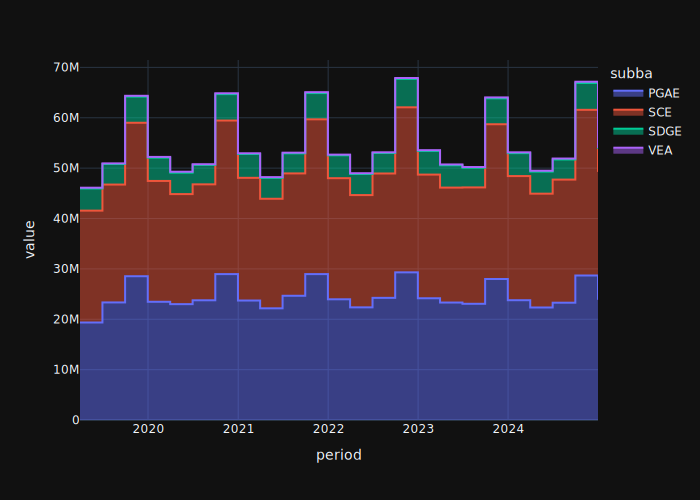

In [23]:
px.area(x, y=x.columns, x=x.index, line_shape='hv')